In [434]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [435]:
registrations = pd.read_csv('data/vehicle_registrations.csv')

registrations.rename(columns={'Electric (EV)': 'Electric'}, inplace=True)

columns_to_int = ['Electric', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)', 'Biodiesel', 'Ethanol/Flex (E85)', 'Compressed Natural Gas (CNG)', 'Propane', 'Hydrogen', 'Gasoline', 'Diesel', 'Unknown Fuel']

for column in columns_to_int:
    registrations[column] = registrations[column].replace({',': ''}, regex=True).astype(int)

registrations['Hybrid'] = registrations['Plug-In Hybrid Electric (PHEV)'] + registrations['Hybrid Electric (HEV)']
columns_to_remove = ['Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']
registrations = registrations.drop(columns=columns_to_remove)

registrations['Fuel'] = registrations['Gasoline'] + registrations['Diesel']
columns_to_remove = ['Gasoline', 'Diesel']
registrations = registrations.drop(columns=columns_to_remove)

registrations['Other'] = registrations['Biodiesel'] + registrations['Ethanol/Flex (E85)'] + registrations['Compressed Natural Gas (CNG)'] + registrations['Propane'] + registrations['Hydrogen'] + registrations['Methanol'] + registrations['Unknown Fuel']
columns_to_remove = ['Biodiesel', 'Ethanol/Flex (E85)', 'Compressed Natural Gas (CNG)', 'Propane', 'Hydrogen', 'Methanol', 'Unknown Fuel']
registrations = registrations.drop(columns=columns_to_remove)

In [436]:
usa = pd.read_csv('data/usa.csv')

columns_to_int = ['Population', 'Land_area']

for column in columns_to_int:
    usa[column] = usa[column].replace({',': ''}, regex=True).astype(int)

# FIGURES

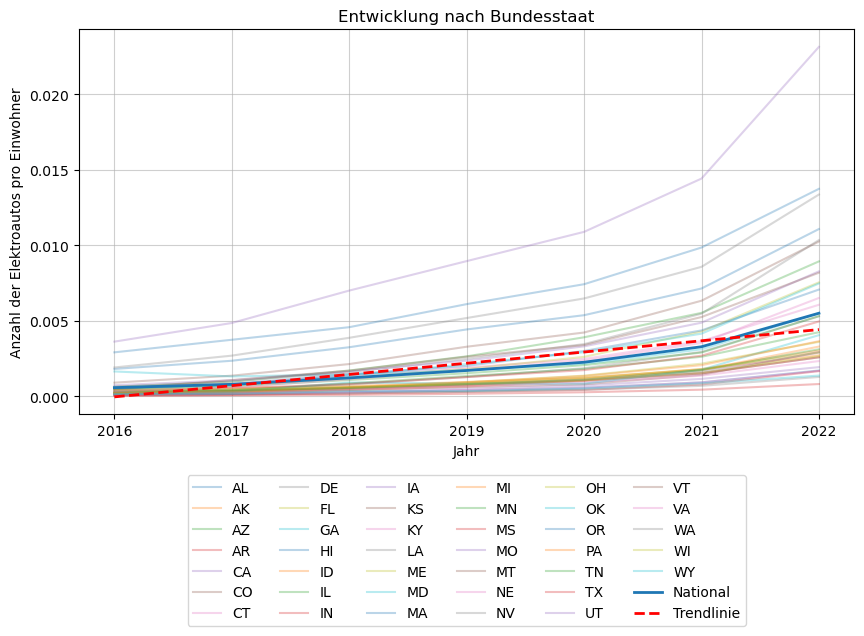

['Alabama' 'Alaska' 'Arkansas' 'Idaho' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Ohio' 'Oklahoma' 'Pennsylvania'
 'Tennessee' 'Wisconsin' 'Wyoming']


In [437]:
# Gesamttrends identifizieren
# Vergleich mir nationalen Durschnittswerten
# Prognossenmodell

## registrations per population (siehe ausreißer CA)

registrations_trend = pd.merge(registrations, usa, on='State')

registrations_trend['Electric/Pop'] = registrations_trend['Electric'] / registrations_trend['Population']

states = registrations_trend['Abbreviation'].unique()

plt.figure(figsize=(10, 5))

for index, state in enumerate(states):
    state_data = registrations_trend[registrations_trend['Abbreviation'] == state]
    plt.plot(state_data['Year'], state_data['Electric/Pop'], label=state, alpha=0.3)

national = registrations_trend.groupby('Year')['Electric/Pop'].mean()

X = national.index.values.reshape(-1, 1)  # Jahr
y = national.values
model = LinearRegression()
model.fit(X, y)

plt.plot(national.index, national.values, linestyle='-', lw=2, label='National')
plt.plot(national.index, model.predict(X), color='red', linestyle='--', lw=2, label='Trendlinie')

plt.title('Entwicklung nach Bundesstaat')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Elektroautos pro Einwohner')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14), ncol=6)
plt.grid(True, alpha=0.6)
plt.show()

reg2022 = registrations_trend[registrations_trend['Year'] == 2022]
below_average = reg2022[reg2022['Electric/Pop'] < model.predict(X)[-1]]

print(below_average['State'].values)
# ['Alabama' 'Alaska' 'Arkansas' 'Idaho' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Ohio' 'Oklahoma' 'Pennsylvania' 'Tennessee' 'Wisconsin' 'Wyoming']

In [438]:
# Regionale Vergleiche, 
# Gruppieren nach Region (bspw. Westen, Osten etc)

<Figure size 1000x500 with 0 Axes>

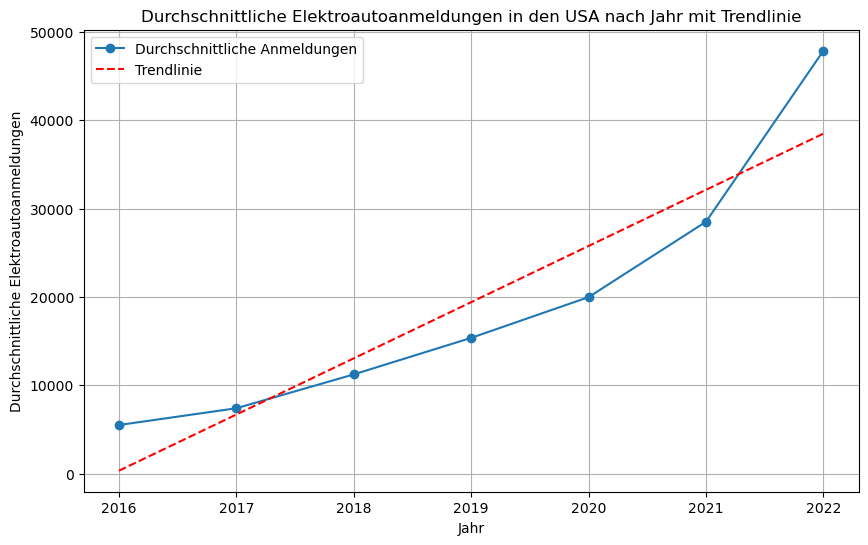

In [439]:
# Gesamttrends identifizieren
# Entwicklung der registrierten Elektroautos im Laufe der Jahre
# Vergleich mit nationalen Durchschnittswert

from scipy.stats import linregress

states = registrations['State'].unique()

plt.figure(figsize=(10,5))

national = registrations.groupby('Year')['Electric'].mean()

# Führen Sie eine lineare Regression durch
slope, intercept, r_value, p_value, std_err = linregress(national.index, national.values)

# Erstellen Sie ein Zeitreihendiagramm für den nationalen Durchschnitt mit der Trendlinie
plt.figure(figsize=(10, 6))
plt.plot(national.index, national.values, marker='o', linestyle='-', label='Durchschnittliche Anmeldungen')
plt.plot(national.index, intercept + slope * national.index, color='red', linestyle='--', label='Trendlinie')

plt.title('Durchschnittliche Elektroautoanmeldungen in den USA nach Jahr mit Trendlinie')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Elektroautoanmeldungen')
plt.legend()
plt.grid(True)
plt.show()

In [440]:
# Fügen Sie eine neue Spalte für die prozentuale Veränderung hinzu
registrations['Prozentuale Veränderung'] = registrations.groupby('State')['Electric'].pct_change() * 100

# Drucken Sie den Durchschnitt der prozentualen Veränderung für jeden Bundesstaat
durchschnittliche_veraenderung = registrations.groupby('State')['Prozentuale Veränderung'].mean()

# Drucken Sie die Bundesstaaten mit dem stärksten Wachstum und solche, die möglicherweise hinterherhinken
starkstes_wachstum = durchschnittliche_veraenderung.idxmax()
hinterherhinken = durchschnittliche_veraenderung.idxmin()

print(f'Bundesstaat mit dem stärksten Wachstum: {starkstes_wachstum}')
print(f'Bundesstaat, der möglicherweise hinterherhinkt: {hinterherhinken}')

Bundesstaat mit dem stärksten Wachstum: Oklahoma
Bundesstaat, der möglicherweise hinterherhinkt: Georgia
